<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Pandas" data-toc-modified-id="Pandas-1">Pandas</a></span><ul class="toc-item"><li><span><a href="#Creating-dataframes" data-toc-modified-id="Creating-dataframes-1.1">Creating dataframes</a></span></li><li><span><a href="#Utility-functions-for-quick-exploration" data-toc-modified-id="Utility-functions-for-quick-exploration-1.2"><strong>Utility functions for quick exploration</strong></a></span></li><li><span><a href="#Efficient-reading-of-data-in-pandas" data-toc-modified-id="Efficient-reading-of-data-in-pandas-1.3"><strong>Efficient reading of data in pandas</strong></a></span></li><li><span><a href="#Pandas-cleaning,-indexing-and-exploration" data-toc-modified-id="Pandas-cleaning,-indexing-and-exploration-1.4">Pandas cleaning, indexing and exploration</a></span><ul class="toc-item"><li><span><a href="#Series-vs-dataframe" data-toc-modified-id="Series-vs-dataframe-1.4.1"><strong>Series vs dataframe</strong></a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-1.4.2"><strong>Explore</strong></a></span></li><li><span><a href="#Cleaning-and-processing" data-toc-modified-id="Cleaning-and-processing-1.4.3"><strong>Cleaning and processing</strong></a></span></li><li><span><a href="#Filtering-and-indexing" data-toc-modified-id="Filtering-and-indexing-1.4.4"><strong>Filtering and indexing</strong></a></span></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-1.4.5">Categorical data</a></span></li><li><span><a href="#Datetime-format" data-toc-modified-id="Datetime-format-1.4.6">Datetime format</a></span></li></ul></li><li><span><a href="#Pandas-manipulation" data-toc-modified-id="Pandas-manipulation-1.5">Pandas manipulation</a></span><ul class="toc-item"><li><span><a href="#Tidy-data" data-toc-modified-id="Tidy-data-1.5.1"><strong>Tidy data</strong></a></span></li><li><span><a href="#Adding-new-columns" data-toc-modified-id="Adding-new-columns-1.5.2">Adding new columns</a></span></li><li><span><a href="#Concatenating-dataframes" data-toc-modified-id="Concatenating-dataframes-1.5.3"><strong>Concatenating dataframes</strong></a></span></li><li><span><a href="#Setting-indexes" data-toc-modified-id="Setting-indexes-1.5.4">Setting indexes</a></span></li><li><span><a href="#Aggregation" data-toc-modified-id="Aggregation-1.5.5"><strong>Aggregation</strong></a></span></li><li><span><a href="#Merging-and-joins" data-toc-modified-id="Merging-and-joins-1.5.6">Merging and joins</a></span></li><li><span><a href="#Applying-function" data-toc-modified-id="Applying-function-1.5.7">Applying function</a></span></li><li><span><a href="#Dropping-columns" data-toc-modified-id="Dropping-columns-1.5.8">Dropping columns</a></span></li><li><span><a href="#Renaming-columns" data-toc-modified-id="Renaming-columns-1.5.9">Renaming columns</a></span></li><li><span><a href="#Exporting-pandas" data-toc-modified-id="Exporting-pandas-1.5.10">Exporting pandas</a></span></li></ul></li><li><span><a href="#Detailed-discussion-of-aggregation" data-toc-modified-id="Detailed-discussion-of-aggregation-1.6">Detailed discussion of aggregation</a></span></li></ul></li></ul></div>

**This notebook I have tried to put together all the common functionalities in pandas.**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [3]:
# !ln -s ~/data/ data #creating symlink

I'm using pokemon dataset for this notebook. Link to the dataset: https://www.kaggle.com/shikhar1/complete-seaborn-tutorial-pokemon/data

## Pandas

### Creating dataframes

In [8]:
data = pd.read_csv('data/pokemon/pokemon.csv')

Creating series

In [209]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [210]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Dataframe from dictionaries

In [212]:
d = {'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]}

In [213]:
d

{'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]}

In [214]:
pd.DataFrame.from_dict(d)

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


### **Utility functions for quick exploration**

Looking at the top few rows

In [10]:
data.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


Looking at the last few rows

In [13]:
data.tail(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


`info()` function outputs datatypes for each column, number of non-missing values and memory usage by the dataframe

In [15]:
data.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


If you're just interested in the memory usage by column you can use `memory_usage()`. This way you can identify the columns which are taking the maximum memory

In [16]:
data.memory_usage(deep=True)

Index            80
#              6400
Name          52357
Type 1        49808
Type 2        38290
HP             6400
Attack         6400
Defense        6400
Sp. Atk        6400
Sp. Def        6400
Speed          6400
Generation     6400
Legendary       800
dtype: int64

For looking at the datatypes: `dtypes`

In [17]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Pairwise Correlation plot between columns

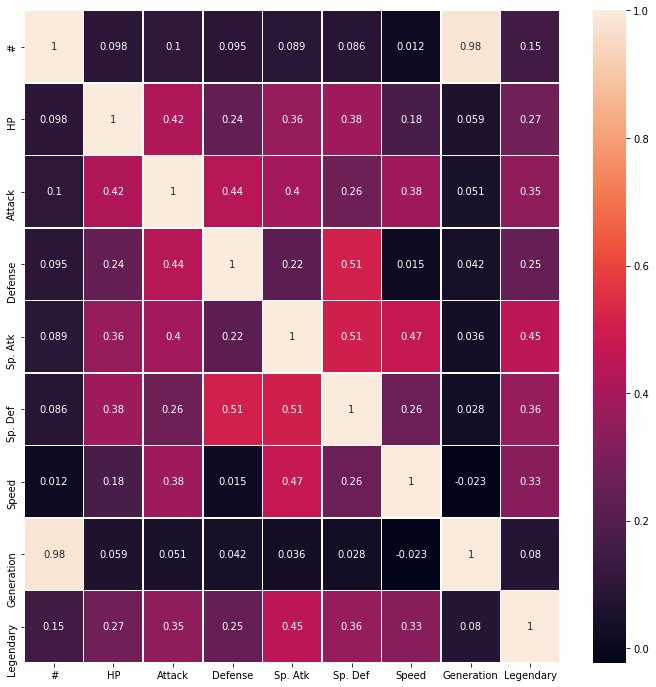

In [22]:
#correlation plot
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, linewidths=.5)

In [23]:
data.columns  #listing the columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [27]:
data.shape  #shape of the dataframe

(800, 12)

Finding missing values by column

In [66]:
data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Finding number of unique values per column

In [67]:
data.nunique()

#             800
Name          799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [216]:
data.sort_values(by='Attack', ascending=False)

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random
Type 1,,,,,,,,,,,,,
Psychic,164,Mega Mewtwo X,Fighting,106,190,100,154,100,130,1,True,290,86
Bug,233,Mega Heracross,Fighting,80,185,115,40,105,75,2,False,300,35
Dragon,427,Mega Rayquaza,Flying,105,180,100,180,100,115,3,True,280,0
Ground,425,Primal Groudon,Fire,100,180,160,150,90,90,3,True,340,21
Dragon,495,Mega Garchomp,Ground,108,170,115,120,95,92,4,False,285,85
Dragon,712,Kyurem Black Kyurem,Ice,125,170,100,120,90,95,5,True,270,15
Psychic,528,Mega Gallade,Fighting,68,165,95,65,115,110,4,False,260,6
Rock,269,Mega Tyranitar,Dark,100,164,150,95,120,71,2,False,314,78
Fire,280,Mega Blaziken,Fighting,80,160,80,130,80,100,3,False,240,65


### **Efficient reading of data in pandas**

Many times we come across large datasets. For memory efficient loading of data we can use some tricks. This comes handy while doing quick experimentation with datasets

For this I have taken data from this link : https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data

**Segue into magic commands**

`%%timeit`: run the cell multiple times and then give mean time and std deviation

`%%time`: run the cell one time and output the time taken

`% vs %%`: % runs just the next line in the cell but %% is for the whole cell

Data occupies ~800 MB on disk

In [19]:
%%timeit -r 3 #-r option to specify number of loops
data1 = pd.read_csv('data/talking-data/test.csv')

23.5 s ± 557 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [20]:
%%time
data1 = pd.read_csv('data/talking-data/test.csv')

CPU times: user 20 s, sys: 2.75 s, total: 22.8 s
Wall time: 24 s


In [21]:
%time
data1.head()
data1 = pd.read_csv(
    'data/talking-data/test.csv')  #this won't be evaluated for runtime

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [22]:
data1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data columns (total 7 columns):
click_id      int64
ip            int64
app           int64
device        int64
os            int64
channel       int64
click_time    object
dtypes: int64(6), object(1)
memory usage: 1003.5+ MB


We can see the datatype used is `int64` and `object` which occupies a lot of memory. Our dataframe takes ~1000 MB on memory. Let's see if we actually require it

Refer to this link for common datatypes and how much memory they store: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

In [24]:
data1.memory_usage()

Index                80
click_id      150323752
ip            150323752
app           150323752
device        150323752
os            150323752
channel       150323752
click_time    150323752
dtype: int64

In [23]:
data1.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


For this we'll look at the minimum and maximum values for each column. We can use `describe()` for this. We don't have categorical data but in case of categorical columns they are generally stored as `object` which is inefficient. Explicitly specify them as `category` dtype while loading data

In [25]:
data1.describe()

,click_id,ip,app,device,os,channel
count,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07
mean,9.395234e+06,6.306921e+04,1.221480e+01,1.730513e+00,1.873312e+01,2.648059e+02
std,5.424341e+06,3.688597e+04,1.164924e+01,2.597038e+01,1.135059e+01,1.355254e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.697617e+06,3.155800e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.350000e+02
50%,9.395234e+06,6.393600e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.360000e+02
75%,1.409285e+07,9.531600e+04,1.800000e+01,1.000000e+00,1.900000e+01,4.010000e+02
max,1.879047e+07,1.264130e+05,5.210000e+02,3.031000e+03,6.040000e+02,4.980000e+02


Based on the maximum values we can specify the dtypes which can accomodate the values and take minimum space. Defining dtypes beforehand greatly decreases the storage

In [46]:
%%time
dtypes = {
    'click_id': 'uint32',
    'ip': 'uint32',
    'app': 'uint16',
    'device': 'uint16',
    'os': 'uint16',
    'channel': 'uint16'
}
data1 = pd.read_csv('data/talking-data/test.csv', dtype=dtypes)

CPU times: user 19.6 s, sys: 1.25 s, total: 20.9 s
Wall time: 21.6 s


In [29]:
data1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data columns (total 7 columns):
click_id      uint32
ip            uint32
app           uint16
device        uint16
os            uint16
channel       uint16
click_time    object
dtypes: object(1), uint16(4), uint32(2)
memory usage: 430.1+ MB


We can see that memory usage has decreased to ~430 MB which is more than 50% reduction

**dask**

Dask is used for parallelized operations on pandas dataframe. Here I'm showing how to use it for faster loading of data but it can be used for many more operations. In the background it stores the data in partitions

In [45]:
%%time
df = dd.read_csv('data/talking-data/test.csv', dtype=dtypes)
df = df.compute()  #.compute() converts dask dataframe back to pandas

CPU times: user 28.7 s, sys: 3.36 s, total: 32.1 s
Wall time: 13 s


We can see that the wall time is 13s compared to 21s

In [49]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18790469 entries, 0 to 672310
Data columns (total 7 columns):
click_id      uint32
ip            uint32
app           uint16
device        uint16
os            uint16
channel       uint16
click_time    object
dtypes: object(1), uint16(4), uint32(2)
memory usage: 573.4+ MB


**Back to pandas**

You can choose which rows to load using `nrows`. This will load first 100 rows. This can be used to quickly insepct data

In [53]:
%%time
data1 = pd.read_csv('data/talking-data/test.csv', dtype=dtypes, nrows=100)

CPU times: user 3.79 ms, sys: 2.38 ms, total: 6.17 ms
Wall time: 5.11 ms


In [51]:
data1.shape

(100, 8)

In [52]:
data1.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
95,2600,12,1,18,265,2017-11-07 19:16:25,NaN,0
96,99926,12,1,13,245,2017-11-06 18:06:05,NaN,0
97,114878,2,2,9,477,2017-11-07 02:35:23,NaN,0
98,173847,3,1,13,452,2017-11-08 14:57:14,NaN,0
99,145747,12,1,13,178,2017-11-07 13:54:07,NaN,0


You can skip rows also using `skiprows`

In [54]:
data1 = pd.read_csv(
    'data/talking-data/test.csv', dtype=dtypes, nrows=100, skiprows=99)

In [55]:
data1.head()

,98,9412,15,1,17,386,2017-11-10 04:00:00
0,99,58280,6,1,19,125,2017-11-10 04:00:00
1,100,5704,9,1,13,489,2017-11-10 04:00:00
2,101,21654,1,1,19,134,2017-11-10 04:00:00
3,102,4259,11,1,13,319,2017-11-10 04:00:00
4,103,17130,15,1,15,265,2017-11-10 04:00:00


see the last and the first row is matching

You can specify row number also for skipping

In [56]:
data1 = pd.read_csv(
    'data/talking-data/test.csv',
    dtype=dtypes,
    nrows=100,
    skiprows=range(1, 100))

In [57]:
data1.head()

,click_id,ip,app,device,os,channel,click_time
0,99,58280,6,1,19,125,2017-11-10 04:00:00
1,100,5704,9,1,13,489,2017-11-10 04:00:00
2,101,21654,1,1,19,134,2017-11-10 04:00:00
3,102,4259,11,1,13,319,2017-11-10 04:00:00
4,103,17130,15,1,15,265,2017-11-10 04:00:00


In [58]:
data1 = pd.read_csv(
    'data/talking-data/test.csv', dtype=dtypes, nrows=100, skiprows=[1, 3, 5])

In [59]:
data1.head()

,click_id,ip,app,device,os,channel,click_time
0,1,119901,9,1,3,466,2017-11-10 04:00:00
1,3,78477,15,1,13,111,2017-11-10 04:00:00
2,5,110769,18,1,13,107,2017-11-10 04:00:00
3,6,12540,3,1,1,137,2017-11-10 04:00:00
4,7,88637,27,1,19,153,2017-11-10 04:00:00


### Pandas cleaning, indexing and exploration

Back to pokemon data :)

#### **Series vs dataframe**

Series is the datastructure for a single column of a DataFrame, not only conceptually, but literally i.e. the data in a DataFrame is **actually stored in memory as a collection of Series.**: https://stackoverflow.com/a/26240208

In [60]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


`[]` invokes series whereas `[[]]` returns a dataframe

In [61]:
data['Name'][0:4]  #pandas series

0        Bulbasaur
1          Ivysaur
2         Venusaur
3    Mega Venusaur
Name: Name, dtype: object

In [64]:
data.Name[0:4]  #we can also use .

0        Bulbasaur
1          Ivysaur
2         Venusaur
3    Mega Venusaur
Name: Name, dtype: object

In [62]:
data[['Name']][0:4]  #pandas dataframe

,Name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Mega Venusaur


#### **Explore**

`value_count()`:Quick count of obs for each level: especially useful for categorical data. This doesn't count NAs

In [68]:
data['Type 1'].value_counts()  #can be called on a series and not a dataframe

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

For NA inclusion

In [69]:
# if there are nan values that also be counted
data['Type 1'].value_counts(dropna=False)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Basic summary stats can be calles for numerical columns

In [70]:
data.HP.mean()

69.25875

In [71]:
data.HP.max()

255

In [73]:
data.HP.count()

800

Basic plots are also there as methods for dataframe

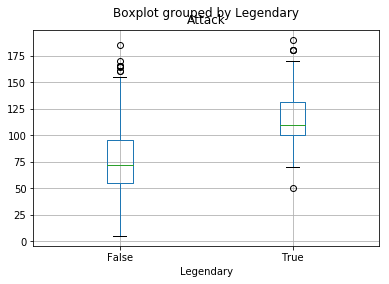

In [74]:
data.boxplot(column='Attack', by='Legendary')

Transposing dataframe

In [207]:
data.T

Type 1,Grass,Grass,Grass,Grass,Fire,Fire,Fire,Bug,Bug,Bug,...,Ghost,Flying,Flying,Dark,Dragon,Rock,Rock,Psychic,Psychic,Fire
#,1,2,3,4,7,8,9,16,17,18,...,788,791,792,794,795,796,797,798,799,800
Name,Bulbasaur,Ivysaur,Venusaur,Mega Venusaur,Charizard,Mega Charizard X,Mega Charizard Y,Butterfree,Weedle,Kakuna,...,Gourgeist Super Size,Noibat,Noivern,Yveltal,Zygarde Half Forme,Diancie,Mega Diancie,Hoopa Confined,Hoopa Unbound,Volcanion
Type 2,Poison,Poison,Poison,Poison,Flying,Dragon,Flying,Flying,Poison,Poison,...,Grass,Dragon,Dragon,Flying,Ground,Fairy,Fairy,Ghost,Dark,Water
HP,45,60,80,80,78,78,78,60,40,45,...,85,40,85,126,108,50,50,80,80,80
Attack,49,62,82,100,84,130,104,45,35,25,...,100,30,70,131,100,100,160,110,160,110
Defense,49,63,83,123,78,111,78,50,30,50,...,122,35,80,95,121,150,110,60,60,120
Sp. Atk,65,80,100,122,109,130,159,90,20,25,...,58,45,97,131,81,100,160,150,170,130
Sp. Def,65,80,100,120,85,85,115,80,20,25,...,75,40,80,98,95,150,110,130,130,90
Speed,45,60,80,80,100,100,100,70,50,35,...,54,55,123,99,95,50,110,70,80,70
Generation,1,1,1,1,1,1,1,1,1,1,...,6,6,6,6,6,6,6,6,6,6


This will just show numeric columns

In [222]:
data.describe(include=['number'])

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Nick,random
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,415.456522,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628,162.850242,47.980676
std,235.907863,22.896557,33.698473,32.593788,33.805061,27.949961,28.521408,1.663010,55.487204,28.376483
min,1.000000,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000,45.000000,0.000000
25%,221.500000,55.000000,59.250000,55.000000,50.000000,55.000000,50.000000,2.000000,123.250000,24.000000
50%,416.000000,70.000000,80.000000,75.500000,70.000000,75.000000,70.000000,3.000000,160.000000,46.000000
75%,622.750000,85.000000,103.000000,100.000000,100.000000,94.750000,91.000000,5.000000,200.000000,74.000000
max,800.000000,150.000000,190.000000,230.000000,180.000000,230.000000,160.000000,6.000000,355.000000,99.000000


Selecting columns by data type

In [238]:
data.select_dtypes(include=['category'])

,Name
Type 1,
Grass,Bulbasaur
Grass,Ivysaur
Grass,Venusaur
Grass,Mega Venusaur
Fire,Charizard
Fire,Mega Charizard X
Fire,Mega Charizard Y
Bug,Butterfree
Bug,Weedle


#### **Cleaning and processing**

In [75]:
data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

`type 1` has null values

In [76]:
data.shape

(800, 12)

**Typecasting**

In [217]:
data.dtypes

#              int64
Name          object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
Nick           int64
random         int64
dtype: object

In [218]:
data['Name'] = data['Name'].astype('category')

In [219]:
data.dtypes

#                int64
Name          category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary         bool
Nick             int64
random           int64
dtype: object

**Missing values**

NaN and None (in object arrays) are considered missing by the isnull and notnull

For datetime64[ns] types, NaT represents missing values

`dropna()`for removing rows containing missing values. `any` will remove rows with any NA and `all` requires the whole row to be NA

In [77]:
data.dropna(axis=0, how='any').shape

(414, 12)

In [78]:
data.dropna(axis=0, how='all').shape

(800, 12)

`fillna()` for replacing NA values

In [81]:
data.fillna('unknown').isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

**Replacing values**

In [83]:
data.Name.replace('Bulbasaur', 'Bulba')[:4]

0            Bulba
1          Ivysaur
2         Venusaur
3    Mega Venusaur
Name: Name, dtype: object

Inplace transformations. Many of these functions have inplace argument. You can use that to make your code shorter. **But beware that you'll lose the original dataframe**

In [84]:
data.dropna(axis=0, how='any', inplace=True)

In [85]:
data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

**Duplicates**

In [90]:
data.duplicated('Type 1')[:4]  #check for duplicates within a column

0    False
1     True
2     True
3     True
dtype: bool

In [91]:
data.Legendary.drop_duplicates(
    keep='last')  #remove duplicates and keep the last entry within duplicates

791    False
799     True
Name: Legendary, dtype: bool

`unique()` to get the unique values within a column

In [92]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Bug', 'Normal', 'Poison', 'Water', 'Rock',
       'Electric', 'Ghost', 'Ground', 'Psychic', 'Ice', 'Dragon', 'Fairy',
       'Dark', 'Steel', 'Fighting', 'Flying'], dtype=object)

#### **Filtering and indexing**

Different ways of indexing

`loc`: using name and `iloc`: integer index is is used for indexing

In [97]:
data.loc[1:4, ["HP"]]

,HP
1,60
2,80
3,80


In [99]:
data.iloc[1, 1]

'Ivysaur'

In [102]:
data.loc[1:3, ["HP", "Attack"]]

,HP,Attack
1,60,62
2,80,82
3,80,100


In [104]:
data[["HP", "Attack"]][:3]

,HP,Attack
0,45,49
1,60,62
2,80,82


Conditional filtering

In [114]:
data.loc[(data['Defense'] > 200) & (data['Attack'] > 100)]  #and

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False


In [115]:
data.loc[(data['Defense'] > 200) | (data['Attack'] > 100)]  #or

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,1,False
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,1,False
92,93,Dodrio,Normal,Flying,60,110,70,60,60,100,1,False
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,1,False
132,133,Scyther,Bug,Flying,70,110,80,55,80,105,1,False
137,138,Mega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False


In [126]:
my_pokemon = ['Volcanion', 'Bulbasaur']

filtering based on a list

In [127]:
data.loc[(data['Name'].isin(my_pokemon))]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [150]:
data.Attack.where(
    data.Attack > 49,
    49)  #filter the data greater than 49 and replace every other value to 49

0       49
1       62
2       82
3      100
6       84
7      130
8      104
15      49
16      49
17      49
18      90
19     150
20      49
21      60
22      80
23      80
26      60
27      90
36      92
39     102
44      49
45      70
46      49
47      80
48      50
49      65
50      80
51      70
52      95
53      55
      ... 
761     75
764     49
765     55
766     89
767    121
768     59
769     77
771     92
772     58
773     50
777     80
778     70
779    110
780     66
781     66
782     66
783     66
784     90
785     85
786     95
787    100
790     49
791     70
793    131
794    100
795    100
796    160
797    110
798    160
799    110
Name: Attack, Length: 414, dtype: int64

#### Categorical data

In [246]:
data.dtypes

#                int64
Name          category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary         bool
Nick             int64
random           int64
dtype: object

For looking at different levels of the categorical variable

In [247]:
data.Name.cat.categories

Index(['Abomasnow', 'Aegislash Blade Forme', 'Aegislash Shield Forme',
       'Aerodactyl', 'Aggron', 'Altaria', 'Amaura', 'Amoonguss', 'Anorith',
       'Archen',
       ...
       'Wormadam Trash Cloak', 'Xatu', 'Yanma', 'Yanmega', 'Yveltal', 'Zapdos',
       'Zekrom', 'Zubat', 'Zweilous', 'Zygarde Half Forme'],
      dtype='object', length=414)

check whether the categories are ordered or not

In [248]:
data.Name.cat.ordered

False

In [251]:
data.Attack.max()

190

In [252]:
def create_bin(x):
    if x < 80:
        return 'low'
    elif x >= 80 and x < 120:
        return 'medium'
    else:
        return 'high'

In [254]:
data['attack_level'] = data.Attack.apply(create_bin)

In [255]:
data.head()

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random,attack_level
Type 1,,,,,,,,,,,,,,
Grass,1,Bulbasaur,Poison,45,49,49,65,65,45,1,False,98,19,low
Grass,2,Ivysaur,Poison,60,62,63,80,80,60,1,False,125,81,low
Grass,3,Venusaur,Poison,80,82,83,100,100,80,1,False,165,20,medium
Grass,4,Mega Venusaur,Poison,80,100,123,122,120,80,1,False,223,38,medium
Fire,7,Charizard,Flying,78,84,78,109,85,100,1,False,162,45,medium


In [257]:
data['attack_level'] = data.attack_level.astype('category')

In [258]:
data.attack_level.cat.categories

Index(['high', 'low', 'medium'], dtype='object')

categorical column is stored as number in the background

In [260]:
data.attack_level.cat.codes

Type 1
Grass       1
Grass       1
Grass       2
Grass       2
Fire        2
Fire        0
Fire        2
Bug         1
Bug         1
Bug         1
Bug         2
Bug         0
Normal      1
Normal      1
Normal      2
Normal      2
Normal      1
Normal      2
Poison      2
Poison      2
Normal      1
Normal      1
Poison      1
Poison      2
Grass       1
Grass       1
Grass       2
Bug         1
Bug         2
Bug         1
           ..
Poison      1
Electric    1
Electric    1
Rock        2
Rock        0
Rock        1
Rock        1
Fighting    2
Electric    1
Rock        1
Steel       2
Ghost       1
Ghost       2
Ghost       1
Ghost       1
Ghost       1
Ghost       1
Ghost       2
Ghost       2
Ghost       2
Ghost       2
Flying      1
Flying      1
Dark        0
Dragon      2
Rock        2
Rock        0
Psychic     2
Psychic     0
Fire        2
Length: 414, dtype: int8

renaming the categories

In [263]:
data.attack_level.cat.categories = ['H', 'L', 'M']

In [264]:
data.attack_level.cat.categories

Index(['H', 'L', 'M'], dtype='object')

In [265]:
data.head()

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random,attack_level
Type 1,,,,,,,,,,,,,,
Grass,1,Bulbasaur,Poison,45,49,49,65,65,45,1,False,98,19,L
Grass,2,Ivysaur,Poison,60,62,63,80,80,60,1,False,125,81,L
Grass,3,Venusaur,Poison,80,82,83,100,100,80,1,False,165,20,M
Grass,4,Mega Venusaur,Poison,80,100,123,122,120,80,1,False,223,38,M
Fire,7,Charizard,Flying,78,84,78,109,85,100,1,False,162,45,M


In [266]:
data.attack_level.cat.reorder_categories = ['H', 'M', 'L']

In [267]:
data.attack_level.cat.categories

Index(['H', 'L', 'M'], dtype='object')

#### Datetime format

`pd.datetime` is generally used to convert string to datetime format. There are many other kinds of date formats

In [311]:
number = np.arange(0, 5)
date_list = [
    "1992-01-10", "1992-02-10", "1992-03-10", "1993-03-15", "1993-03-16"
]
df = pd.DataFrame({'a': pd.to_datetime(date_list), 'b': number})
df

,a,b
0,1992-01-10,0
1,1992-02-10,1
2,1992-03-10,2
3,1993-03-15,3
4,1993-03-16,4


In the dt object of datetime column, we have functions to extract day,year, month, day of week,....

In [314]:
df.a.dt.day

0    10
1    10
2    10
3    15
4    16
Name: a, dtype: int64

In [315]:
df.a.dt.year

0    1992
1    1992
2    1992
3    1993
4    1993
Name: a, dtype: int64

### Pandas manipulation

#### **Tidy data**

**Wide --> Long**

In [152]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False


In [153]:
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(
    data,
    id_vars='Name',
    value_vars=['Attack', 'Defense'],
    var_name='skill-type',
    value_name='value')

In [154]:
melted.head()

,Name,skill-type,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charizard,Attack,84


**Long --> Wide**

In [156]:
melted.pivot(index='Name', columns='skill-type', values='value').head()

skill-type,Attack,Defense
Name,,
Abomasnow,92,75
Aegislash Blade Forme,150,50
Aegislash Shield Forme,50,150
Aerodactyl,105,65
Aggron,110,180


#### Adding new columns

Both doing the same thing. Creating new columns based on existing columns

In [162]:
data.assign(Nick=lambda x: 2 * x.Attack + 2 * x.Defense).head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,196
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,250
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,330
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,446
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,324


In [164]:
data['Nick'] = data.apply(lambda x: x.Attack + x.Defense, axis=1)

In [165]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,162


Adding columns from a new datastructure

In [166]:
data['random'] = np.random.randint(0, 100, data.shape[0])

In [167]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98,19
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125,81
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165,20
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223,38
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,162,45


#### **Concatenating dataframes**

Vertical concatenation

In [168]:
data1 = data.head()
data2 = data.tail()
data1.append(data2)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98,19
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125,81
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165,20
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223,38
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,162,45
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,250,90
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,270,43
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,170,91
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,220,92
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,230,35


In [169]:
pd.concat([data1, data2], axis=0, ignore_index=True)  #stack by rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98,19
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125,81
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165,20
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223,38
4,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,162,45
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,250,90
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,270,43
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,170,91
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,220,92
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,230,35


Horizontal concatenation

In [174]:
data1 = data['Attack'].head()
data2 = data['Defense'].head()
conc_data_col = pd.concat(
    [data1, data2], axis=1)  # axis = 0 : stack by columns
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
6,84,78


#### Setting indexes

Single index

In [180]:
data.set_index('Type 1', inplace=True)

In [181]:
data.head()

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random
Type 1,,,,,,,,,,,,,
Grass,1,Bulbasaur,Poison,45,49,49,65,65,45,1,False,98,19
Grass,2,Ivysaur,Poison,60,62,63,80,80,60,1,False,125,81
Grass,3,Venusaur,Poison,80,82,83,100,100,80,1,False,165,20
Grass,4,Mega Venusaur,Poison,80,100,123,122,120,80,1,False,223,38
Fire,7,Charizard,Flying,78,84,78,109,85,100,1,False,162,45


multi-level index

In [184]:
data1 = data.set_index(["Type 2", "Legendary"])

#### **Aggregation**

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [186]:
data.head(4)

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random
Type 1,,,,,,,,,,,,,
Grass,1,Bulbasaur,Poison,45,49,49,65,65,45,1,False,98,19
Grass,2,Ivysaur,Poison,60,62,63,80,80,60,1,False,125,81
Grass,3,Venusaur,Poison,80,82,83,100,100,80,1,False,165,20
Grass,4,Mega Venusaur,Poison,80,100,123,122,120,80,1,False,223,38


NA groups in GroupBy are automatically excluded.

In [187]:
data.groupby('Type 1').mean()  #it skipped categorical columns

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random
Type 1,,,,,,,,,,,
Bug,359.519231,58.134615,77.711538,75.730769,58.634615,71.711538,66.173077,3.134615,0.000000,153.442308,51.076923
Dark,535.000000,69.809524,88.190476,74.523810,71.476190,73.238095,73.047619,4.142857,0.047619,162.714286,49.857143
Dragon,503.095238,94.571429,122.571429,96.476190,116.238095,97.857143,94.666667,3.714286,0.571429,219.047619,45.952381
Electric,507.000000,59.470588,68.882353,83.764706,108.882353,85.352941,84.470588,3.882353,0.176471,152.647059,46.000000
Fairy,355.500000,70.000000,45.000000,90.000000,100.000000,110.000000,60.000000,3.000000,0.000000,135.000000,19.000000
Fighting,503.000000,66.142857,95.857143,75.142857,82.571429,69.857143,88.285714,4.142857,0.000000,171.000000,69.285714
Fire,425.208333,78.291667,92.166667,78.708333,105.458333,80.166667,76.791667,3.708333,0.166667,170.875000,46.791667
Flying,791.500000,62.500000,50.000000,57.500000,71.000000,60.000000,89.000000,6.000000,0.000000,107.500000,31.000000
Ghost,580.909091,71.318182,72.545455,78.090909,82.045455,70.590909,69.500000,4.500000,0.090909,150.636364,43.636364


In [188]:
data.groupby(level=0).max()  #aggregating by index: Type1

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random
Type 1,,,,,,,,,,,,,
Bug,735,Yanmega,Water,86,185,230,135,230,160,6,False,300,99
Dark,794,Zweilous,Steel,126,131,125,140,115,125,6,True,226,96
Dragon,795,Zygarde Half Forme,Psychic,125,180,130,180,150,120,6,True,285,96
Electric,773,Zapdos,Water,90,115,115,165,110,111,6,True,200,94
Fairy,520,Togetic,Flying,85,50,95,120,115,80,4,False,145,32
Fighting,772,Pangoro,Steel,95,145,88,140,85,118,6,False,233,94
Fire,800,Volcanion,Water,110,160,120,159,154,126,6,True,241,98
Flying,792,Noivern,Dragon,85,70,80,97,80,123,6,False,150,45
Ghost,788,Trevenant,Poison,150,120,122,170,120,130,6,True,222,89


In [190]:
data1.groupby(level=1).mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Nick,random
Legendary,,,,,,,,,,
False,399.86631,67.893048,79.213904,77.548128,71.804813,72.328877,67.665775,3.339572,156.762032,47.451872
True,561.22500,96.425000,120.200000,99.575000,126.075000,105.825000,97.150000,4.075000,219.775000,52.925000


In [193]:
data1.groupby(level=1).agg({'Attack': lambda x: sum(x) / len(x)})

,Attack
Legendary,
False,79.213904
True,120.200000


removing the index

In [194]:
data1.reset_index(inplace=True)

In [195]:
data1.head()

,Type 2,Legendary,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Nick,random
0,Poison,False,1,Bulbasaur,45,49,49,65,65,45,1,98,19
1,Poison,False,2,Ivysaur,60,62,63,80,80,60,1,125,81
2,Poison,False,3,Venusaur,80,82,83,100,100,80,1,165,20
3,Poison,False,4,Mega Venusaur,80,100,123,122,120,80,1,223,38
4,Flying,False,7,Charizard,78,84,78,109,85,100,1,162,45


#### Merging and joins

we can use merge for joining multiple tables

In [200]:
np.random.choice(['Ash', 'Brock', 'TeamKat'], 5)

array(['Brock', 'Ash', 'Ash', 'Ash', 'TeamKat'], dtype='<U7')

In [202]:
pokemon_owner = pd.DataFrame({
    '#':
    data['#'],
    'Owner':
    np.random.choice(['Ash', 'Brock', 'TeamKat'], data.shape[0])
})

In [204]:
pokemon_owner.head()

,#,Owner
Type 1,,
Grass,1,Brock
Grass,2,Ash
Grass,3,Ash
Grass,4,TeamKat
Fire,7,Brock


In [206]:
pd.merge(data, pokemon_owner, how='left', on='#').head()

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random,Owner
0,1,Bulbasaur,Poison,45,49,49,65,65,45,1,False,98,19,Brock
1,2,Ivysaur,Poison,60,62,63,80,80,60,1,False,125,81,Ash
2,3,Venusaur,Poison,80,82,83,100,100,80,1,False,165,20,Ash
3,4,Mega Venusaur,Poison,80,100,123,122,120,80,1,False,223,38,TeamKat
4,7,Charizard,Flying,78,84,78,109,85,100,1,False,162,45,Brock


#### Applying function

In [226]:
data.Attack.apply(lambda x: 2 * x).head()

Type 1
Grass     98
Grass    124
Grass    164
Grass    200
Fire     168
Name: Attack, dtype: int64

#### Dropping columns

In [229]:
data.drop(['Name', 'Nick'], axis=1)

,#,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,random
Type 1,,,,,,,,,,,
Grass,1,Poison,45,49,49,65,65,45,1,False,19
Grass,2,Poison,60,62,63,80,80,60,1,False,81
Grass,3,Poison,80,82,83,100,100,80,1,False,20
Grass,4,Poison,80,100,123,122,120,80,1,False,38
Fire,7,Flying,78,84,78,109,85,100,1,False,45
Fire,8,Dragon,78,130,111,130,85,100,1,False,17
Fire,9,Flying,78,104,78,159,115,100,1,False,42
Bug,16,Flying,60,45,50,90,80,70,1,False,75
Bug,17,Poison,40,35,30,20,20,50,1,False,99


#### Renaming columns

In [233]:
data.rename(columns={'Name': 'Pokemon_name', 'Type 2': 'Type2'}).head()

,#,Pokemon_name,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Nick,random
Type 1,,,,,,,,,,,,,
Grass,1,Bulbasaur,Poison,45,49,49,65,65,45,1,False,98,19
Grass,2,Ivysaur,Poison,60,62,63,80,80,60,1,False,125,81
Grass,3,Venusaur,Poison,80,82,83,100,100,80,1,False,165,20
Grass,4,Mega Venusaur,Poison,80,100,123,122,120,80,1,False,223,38
Fire,7,Charizard,Flying,78,84,78,109,85,100,1,False,162,45


making columns names lower case

In [236]:
data.rename(columns=str.lower).head()

,#,name,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,nick,random
Type 1,,,,,,,,,,,,,
Grass,1,Bulbasaur,Poison,45,49,49,65,65,45,1,False,98,19
Grass,2,Ivysaur,Poison,60,62,63,80,80,60,1,False,125,81
Grass,3,Venusaur,Poison,80,82,83,100,100,80,1,False,165,20
Grass,4,Mega Venusaur,Poison,80,100,123,122,120,80,1,False,223,38
Fire,7,Charizard,Flying,78,84,78,109,85,100,1,False,162,45


Converting to numpy

In [241]:
data.values

array([[1, 'Bulbasaur', 'Poison', ..., False, 98, 19],
       [2, 'Ivysaur', 'Poison', ..., False, 125, 81],
       [3, 'Venusaur', 'Poison', ..., False, 165, 20],
       ...,
       [798, 'Hoopa Confined', 'Ghost', ..., True, 170, 91],
       [799, 'Hoopa Unbound', 'Dark', ..., True, 220, 92],
       [800, 'Volcanion', 'Water', ..., True, 230, 35]], dtype=object)

#### Exporting pandas

In [242]:
data.to_csv('data/xyz.csv', index=False)

For big dataframes best way to backup is feather format as reading from it is a lot faster

In [245]:
data.to_feather('data/xyz')

### Detailed discussion of aggregation

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [272]:
data = pd.read_csv('data/pokemon/pokemon.csv')

In [273]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


grouping the data

In [274]:
group = data.groupby(['Type 1', 'Type 2'])

In [275]:
group

In [278]:
group.last()

#                     Name   HP  Attack  Defense  \
Type 1   Type 2                                                         
Bug      Electric  658               Galvantula   70      77       60   
         Fighting  233           Mega Heracross   80     185      115   
         Fire      699                Volcarona   85      60       65   
         Flying    735                 Vivillon   80      52       50   
         Ghost     317                 Shedinja    1      90       45   
         Grass     603                 Leavanny   75     103       80   
         Ground    460     Wormadam Sandy Cloak   60      79      105   
         Poison    606                Scolipede   60     100       89   
         Rock      620                  Crustle   70      95      125   
         Steel     718                 Genesect   71     120       95   
         Water     308                  Surskit   40      30       32   
Dark     Dragon    697                Hydreigon   92     105       90   
         Fighting  622                  Scrafty   65      90      115   
         Fire      249            Mega Houndoom   75      90       90   
         Flying    794                  Yveltal  126     131       95   
         Ghost     328             Mega Sableye   50      85      125   
         Ice       513                  Weavile   70     120       65   
         Psychic   758                  Malamar   86      92       88   
         Steel     687                  Bisharp   65     125      100   
Dragon   Electric  708                   Zekrom  100     150      120   
         Fairy     367             Mega Altaria   75     110      110   
         Fire      707                 Reshiram  100     120      100   
         Flying    427            Mega Rayquaza  105     180      100   
         Ground    795       Zygarde Half Forme  108     100      121   
         Ice       713      Kyurem White Kyurem  125     120       90   
         Psychic   421              Mega Latios   80     130      100   
Electric Dragon    197            Mega Ampharos   90      95      105   
         Fairy     773                  Dedenne   67      58       57   
         Fire      533               Heat Rotom   50      65      107   
         Flying    706  Thundurus Therian Forme   79     105       70   
...                ...                      ...  ...     ...      ...   
Rock     Fighting  701                Terrakion   91     129       90   
         Flying    629                 Archeops   75     140       65   
         Grass     379                  Cradily   86      81       97   
         Ground    267                  Pupitar   70      84       70   
         Ice       770                  Aurorus  123      77       72   
         Psychic   371                  Solrock   70      95       85   
         Steel     529                Probopass   60      55      145   
         Water     760               Barbaracle   72     105      115   
Steel    Dragon    541                   Dialga  100     120      120   
         Fairy     778                   Klefki   57      80       91   
         Fighting  700                 Cobalion   91      90      129   
         Flying    246                 Skarmory   65      80      140   
         Ghost     752   Aegislash Shield Forme   60      50      150   
         Ground    225             Mega Steelix   75     125      230   
         Psychic   486                 Bronzong   67      89      116   
         Rock      333                   Aggron   70     110      180   
Water    Dark      727                 Greninja   72      95       67   
         Dragon    542                   Palkia   90     120      100   
         Electric  186                  Lanturn  125      58       58   
         Fairy     200                Azumarill  100      50       80   
         Fighting  715    Keldeo Resolute Forme   91      72       90   
         Flying    643                   Swanna   75      87       63   
      

In [280]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [283]:
data['Type 2'].groupby(data['Type 1']).count()

Type 1
Bug         52
Dark        21
Dragon      21
Electric    17
Fairy        2
Fighting     7
Fire        24
Flying       2
Ghost       22
Grass       37
Ground      19
Ice         11
Normal      37
Poison      13
Psychic     19
Rock        35
Steel       22
Water       53
Name: Type 2, dtype: int64

In [284]:
group = data.groupby(['Type 1', 'Type 2'])

getting data for a specific group

In [289]:
group.get_group(('Water', 'Dark'))

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
141,142,Mega Gyarados,Water,Dark,95,155,109,70,130,81,1,False
347,348,Carvanha,Water,Dark,45,90,20,65,20,65,3,False
348,349,Sharpedo,Water,Dark,70,120,40,95,40,95,3,False
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False
374,375,Crawdaunt,Water,Dark,63,120,85,90,55,55,3,False
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False


We can use `aggregate()` to perform aggregation on groups

In [290]:
group.aggregate(np.sum)

#   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1   Type 2                                                          
Bug      Electric  1315  120     124      110      154      110    173   
         Fighting   465  160     310      190       80      200    160   
         Fire      1397  140     145      120      185      160    160   
         Flying    4418  882     982      862     1020      967   1160   
         Ghost      317    1      90       45       30       30     40   
         Grass     2370  330     443      460      344      460    267   
         Ground     775   91     124      195       89      115     76   
         Poison    2656  645     820      697      510      712    791   
         Rock      1470  140     170      440      110      340    105   
         Steel     3204  474     803      787      477      583    444   
         Water      308   40      30       32       50       52     65   
Dark     Dragon    2088  216     255      210      235      210    194   
         Fighting  1243  115     165      185       80      185    106   
         Fire       744  195     240      170      330      220    275   
         Flying    2870  466     461      369      421      352    401   
         Ghost      655  100     160      200      150      180     70   
         Ice        747  125     215      120       80      160    240   
         Psychic   1515  139     146      141      105      121    118   
         Steel     1373  110     210      170      100      110    130   
Dragon   Electric   708  100     150      120      120      100     90   
         Fairy      367   75     110      110      110      105     80   
         Fire       707  100     120      100      150      120     90   
         Flying    2200  566     814      585      730      565    590   
         Ground    2769  450     560      441      371      375    413   
         Ice       2136  375     420      280      420      280    285   
         Psychic   1678  320     400      390      540      510    440   
Electric Dragon     197   90      95      105      165      110     45   
         Fairy      773   67      58       57       81       67    101   
         Fire       533   50      65      107      105      107     86   
         Flying    2754  353     450      392      575      417    501   
...                 ...  ...     ...      ...      ...      ...    ...   
Rock     Fighting   701   91     129       90       72       90    108   
         Flying    1566  290     492      260      316      280    460   
         Grass      757  152     122      174      142      194     66   
         Ground     883  330     488      625      270      305    262   
         Ice       1539  200     136      122      166      155    104   
         Psychic    741  140     150      150      150      150    140   
         Steel     1442  150     149      431      164      376    100   
         Water     2125  309     452      602      418      382    343   
Steel    Dragon     541  100     120      120      150      100     90   
         Fairy     1437  157     270      301      190      237    175   
         Fighting   700   91      90      129       90       72    108   
         Flying     246   65      80      140       40       70     70   
         Ghost     3002  224     390      450      280      286    183   
         Ground     449  150     210      430      110      160     60   
         Psychic   3049  484     623      762      493      642    416   
         Rock       996  180     270      420      150      150    120   
Water    Dark      2291  415     720      391      533      381    523   
         Dragon     792  165     215      195      245      215    185   
         Electric   371  200      96       96      132      132    134   
         Fairy      399  170      70      130       80      130     90   
         Fighting  1497  272     239      275      328      270    286   
         Flying    2785  4

You can apply `reset_index()` to bring index column into df

In [291]:
group.aggregate(np.sum).reset_index()

,Type 1,Type 2,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bug,Electric,1315,120,124,110,154,110,173,10,0.0
1,Bug,Fighting,465,160,310,190,80,200,160,4,0.0
2,Bug,Fire,1397,140,145,120,185,160,160,10,0.0
3,Bug,Flying,4418,882,982,862,1020,967,1160,40,0.0
4,Bug,Ghost,317,1,90,45,30,30,40,3,0.0
5,Bug,Grass,2370,330,443,460,344,460,267,21,0.0
6,Bug,Ground,775,91,124,195,89,115,76,7,0.0
7,Bug,Poison,2656,645,820,697,510,712,791,28,0.0
8,Bug,Rock,1470,140,170,440,110,340,105,12,0.0
9,Bug,Steel,3204,474,803,787,477,583,444,25,0.0


multiple aggregation

In [295]:
group.aggregate([np.sum, np.mean]).reset_index()

Type 1    Type 2     #               HP             Attack              \
                          sum        mean  sum        mean    sum        mean   
0         Bug  Electric  1315  657.500000  120   60.000000    124   62.000000   
1         Bug  Fighting   465  232.500000  160   80.000000    310  155.000000   
2         Bug      Fire  1397  698.500000  140   70.000000    145   72.500000   
3         Bug    Flying  4418  315.571429  882   63.000000    982   70.142857   
4         Bug     Ghost   317  317.000000    1    1.000000     90   90.000000   
5         Bug     Grass  2370  395.000000  330   55.000000    443   73.833333   
6         Bug    Ground   775  387.500000   91   45.500000    124   62.000000   
7         Bug    Poison  2656  221.333333  645   53.750000    820   68.333333   
8         Bug      Rock  1470  490.000000  140   46.666667    170   56.666667   
9         Bug     Steel  3204  457.714286  474   67.714286    803  114.714286   
10        Bug     Water   308  308.000000   40   40.000000     30   30.000000   
11       Dark    Dragon  2088  696.000000  216   72.000000    255   85.000000   
12       Dark  Fighting  1243  621.500000  115   57.500000    165   82.500000   
13       Dark      Fire   744  248.000000  195   65.000000    240   80.000000   
14       Dark    Flying  2870  574.000000  466   93.200000    461   92.200000   
15       Dark     Ghost   655  327.500000  100   50.000000    160   80.000000   
16       Dark       Ice   747  373.500000  125   62.500000    215  107.500000   
17       Dark   Psychic  1515  757.500000  139   69.500000    146   73.000000   
18       Dark     Steel  1373  686.500000  110   55.000000    210  105.000000   
19     Dragon  Electric   708  708.000000  100  100.000000    150  150.000000   
20     Dragon     Fairy   367  367.000000   75   75.000000    110  110.000000   
21     Dragon      Fire   707  707.000000  100  100.000000    120  120.000000   
22     Dragon    Flying  2200  366.666667  566   94.333333    814  135.666667   
23     Dragon    Ground  2769  553.800000  450   90.000000    560  112.000000   
24     Dragon       Ice  2136  712.000000  375  125.000000    420  140.000000   
25     Dragon   Psychic  1678  419.500000  320   80.000000    400  100.000000   
26   Electric    Dragon   197  197.000000   90   90.000000     95   95.000000   
27   Electric     Fairy   773  773.000000   67   67.000000     58   58.000000   
28   Electric      Fire   533  533.000000   50   50.000000     65   65.000000   
29   Electric    Flying  2754  550.800000  353   70.600000    450   90.000000   
..        ...       ...   ...         ...  ...         ...    ...         ...   
106      Rock  Fighting   701  701.000000   91   91.000000    129  129.000000   
107      Rock    Flying  1566  391.500000  290   72.500000    492  123.000000   
108      Rock     Grass   757  378.500000  152   76.000000    122   61.000000   
109      Rock    Ground   883  147.166667  330   55.000000    488   81.333333   
110      Rock       Ice  1539  769.500000  200  100.000000    136   68.000000   
111      Rock   Psychic   741  370.500000  140   70.000000    150   75.000000   
112      Rock     Steel  1442  480.666667  150   50.000000    149   49.666667   
113      Rock     Water  2125  354.166667  309   51.500000    452   75.333333   
114     Steel    Dragon   541  541.000000  100  100.000000    120  120.000000   
115     Steel     Fairy  1437  479.000000  157   52.333333    270   90.000000   
116     Steel  Fighting   700  700.000000   91   91.000000     90   90.000000   
117     Steel    Flying   246  246.000000   65   65.000000     80   80.000000   
118     Steel     Ghost  3002  750.500000  224   56.000000    390   97.500000   
119     Steel    Ground   449  224.500000  150   75.000000    210  105.000000   
120     Steel   Psychic  3049  435.571429  484   69.142857    623   89.000000   
121     Steel      Rock   996  332.000000  180   60.000000    270   90.000000   
122     Water      Dark  2291  381.833

`size()` can be called on group to get the count in each group

In [292]:
group.size()

Type 1    Type 2  
Bug       Electric     2
          Fighting     2
          Fire         2
          Flying      14
          Ghost        1
          Grass        6
          Ground       2
          Poison      12
          Rock         3
          Steel        7
          Water        1
Dark      Dragon       3
          Fighting     2
          Fire         3
          Flying       5
          Ghost        2
          Ice          2
          Psychic      2
          Steel        2
Dragon    Electric     1
          Fairy        1
          Fire         1
          Flying       6
          Ground       5
          Ice          3
          Psychic      4
Electric  Dragon       1
          Fairy        1
          Fire         1
          Flying       5
                      ..
Rock      Fighting     1
          Flying       4
          Grass        2
          Ground       6
          Ice          2
          Psychic      2
          Steel        3
          Water        6
Steel 

Group wise descriptive stats

In [293]:
group.describe()

#                                                        \
                  count        mean         std    min     25%    50%     75%   
Type 1   Type 2                                                                 
Bug      Electric   2.0  657.500000    0.707107  657.0  657.25  657.5  657.75   
         Fighting   2.0  232.500000    0.707107  232.0  232.25  232.5  232.75   
         Fire       2.0  698.500000    0.707107  698.0  698.25  698.5  698.75   
         Flying    14.0  315.571429  193.436419   16.0  180.25  300.0  462.75   
         Ghost      1.0  317.000000         NaN  317.0  317.00  317.0  317.00   
         Grass      6.0  395.000000  271.019556   52.0  154.50  530.0  601.75   
         Ground     2.0  387.500000  102.530483  315.0  351.25  387.5  423.75   
         Poison    12.0  221.333333  246.796321   17.0   19.75  118.5  370.75   
         Rock       3.0  490.000000  224.301137  231.0  425.00  619.0  619.50   
         Steel      7.0  457.714286  231.353780  221.0  229.50  461.0  672.50   
         Water      1.0  308.000000         NaN  308.0  308.00  308.0  308.00   
Dark     Dragon     3.0  696.000000    1.000000  695.0  695.50  696.0  696.50   
         Fighting   2.0  621.500000    0.707107  621.0  621.25  621.5  621.75   
         Fire       3.0  248.000000    1.000000  247.0  247.50  248.0  248.50   
         Flying     5.0  574.000000  231.645203  214.0  479.00  691.0  692.00   
         Ghost      2.0  327.500000    0.707107  327.0  327.25  327.5  327.75   
         Ice        2.0  373.500000  197.282792  234.0  303.75  373.5  443.25   
         Psychic    2.0  757.500000    0.707107  757.0  757.25  757.5  757.75   
         Steel      2.0  686.500000    0.707107  686.0  686.25  686.5  686.75   
Dragon   Electric   1.0  708.000000         NaN  708.0  708.00  708.0  708.00   
         Fairy      1.0  367.000000         NaN  367.0  367.00  367.0  367.00   
         Fire       1.0  707.000000         NaN  707.0  707.00  707.0  707.00   
         Flying     6.0  366.666667  102.683332  162.0  376.75  409.5  422.00   
         Ground     5.0  553.800000  134.839534  492.0  493.00  494.0  495.00   
         Ice        3.0  712.000000    1.000000  711.0  711.50  712.0  712.50   
         Psychic    4.0  419.500000    1.290994  418.0  418.75  419.5  420.25   
Electric Dragon     1.0  197.000000         NaN  197.0  197.00  197.0  197.00   
         Fairy      1.0  773.000000         NaN  773.0  773.00  773.0  773.00   
         Fire       1.0  533.000000         NaN  533.0  533.00  533.0  533.00   
         Flying     5.0  550.800000  230.227496  158.0  536.00  649.0  705.00   
...                 ...         ...         ...    ...     ...    ...     ...   
Rock     Fighting   1.0  701.000000         NaN  701.0  701.00  701.0  701.00   
         Flying     4.0  391.500000  273.664637  154.0  154.75  391.5  628.25   
         Grass      2.0  378.500000    0.707107  378.0  378.25  378.5  378.75   
         Ground     6.0  147.166667   92.829773   81.0   82.25   93.5  225.50   
         Ice        2.0  769.500000    0.707107  769.0  769.25  769.5  769.75   
         Psychic    2.0  370.500000    0.707107  370.0  370.25  370.5  370.75   
         Steel      3.0  480.666667   41.860881  456.0  456.50  457.0  493.00   
         Water      6.0  354.166667  313.971602  150.0  151.25  152.5  607.50   
Steel    Dragon     1.0  541.000000         NaN  541.0  541.00  541.0  541.00   
         Fairy      3.0  479.000000  258.942078  329.0  329.50  330.0  554.00   
         Fighting   1.0  700.000000         NaN  700.0  700.00  700.0  700.00   
         Flying     1.0  246.000000         NaN  246.0  246.00  246.0  246.00   
         Ghost      4.0  750.500000    1.290994  749.0  749.75  750.5  751.25   
         Ground     2.0  224.500000    0.707107  224.0  224.25  224.5  224.75   
         Psychic    7.0  435.571429   34.587364  411.0  412.50  414.0  456.50   
         Rock       3.0  332.000000    1.000000  331.